28_SIR= 1 2 3
_R0= 2.7153
_Re= 2.1369 

1 _238_I <= 閾値 , 行動制限度p=0.3 , not(行動制限中), 閾値超え 
 True True True False 3 

1 250_self.persons[ 0 ].standstill= False
1 _251_self.persons[ 0 ].vel= [1.82975183 0.80747027] 

1 250_self.persons[ 1 ].standstill= False
1 _251_self.persons[ 1 ].vel= [ 1.99544373 -0.13492335] 

1 250_self.persons[ 2 ].standstill= False
1 _251_self.persons[ 2 ].vel= [1.99539863 0.1355887 ] 

1 250_self.persons[ 3 ].standstill= True
1 _251_self.persons[ 3 ].vel= [0. 0.] 

2 _238_I <= 閾値 , 行動制限度p=0.3 , not(行動制限中), 閾値超え 
 True True True False 3 

2 250_self.persons[ 0 ].standstill= False
2 _251_self.persons[ 0 ].vel= [1.82975183 0.80747027] 

2 250_self.persons[ 1 ].standstill= False
2 _251_self.persons[ 1 ].vel= [-1.99544373 -0.13492335] 

2 250_self.persons[ 2 ].standstill= False
2 _251_self.persons[ 2 ].vel= [1.99539863 0.1355887 ] 

2 250_self.persons[ 3 ].standstill= True
2 _251_self.persons[ 3 ].vel= [0. 0.] 

3 _238_I <= 閾値 , 行動制限度p=0.3 , not(行動制限中), 閾値超え 
 True True

30 _251_self.persons[ 2 ].vel= [-1.59565846  1.20576701] 

30 250_self.persons[ 3 ].standstill= True
30 _251_self.persons[ 3 ].vel= [ 0.38399661 -1.96279051] 

31 _238_I <= 閾値 , 行動制限度p=0.3 , not(行動制限中), 閾値超え 
 True True False True 3 

31 250_self.persons[ 0 ].standstill= False
31 _251_self.persons[ 0 ].vel= [ 0.64900535 -1.89176956] 

31 250_self.persons[ 1 ].standstill= False
31 _251_self.persons[ 1 ].vel= [ 1.92384858 -0.54663207] 

31 250_self.persons[ 2 ].standstill= False
31 _251_self.persons[ 2 ].vel= [-1.59565846  1.20576701] 

31 250_self.persons[ 3 ].standstill= True
31 _251_self.persons[ 3 ].vel= [ 0.38399661 -1.96279051] 

32 _238_I <= 閾値 , 行動制限度p=0.3 , not(行動制限中), 閾値超え 
 True True False True 3 

32 250_self.persons[ 0 ].standstill= False
32 _251_self.persons[ 0 ].vel= [0.64900535 1.89176956] 

32 250_self.persons[ 1 ].standstill= False
32 _251_self.persons[ 1 ].vel= [ 1.92384858 -0.54663207] 

32 250_self.persons[ 2 ].standstill= False
32 _251_self.persons[ 2 ].vel= [-1.595

<ipython-input-40-d18d98305f51>:303: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


259_tuple(self.persons[0].coords[ 0 ])= (0.0, 0.0)
259_tuple(self.persons[0].coords[ 0 ])= (0.0, 0.0)
259_tuple(self.persons[0].coords[ 1 ])= (0.018297518291545137, 0.008074702741932432)
259_tuple(self.persons[0].coords[ 2 ])= (0.036595036583090275, 0.016149405483864863)
257_simu_k= 45 , len(self.persons)= 4


    Hello_world


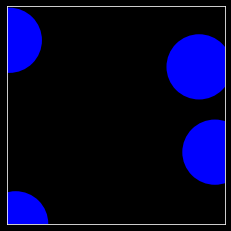

In [40]:
import numpy as np                      
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from enum import Enum, auto
from random import uniform, random
from math import cos, sin, pi, inf, sqrt
import os

this_dir = "C:\\Users\\na366\\Desktop\\Python\\SIR"
radius = 0.075            # 0.25 /0.075 = 3_number_密_1,0,0,1,0
dt = 0.01
half = 0.25          # half =5 _ /0.075= 66_(number500= 22^2)_密_1,0,0,1,0,
speed = 2                 # dt*speed=0.02,_line_84_隙間0.075移動は、i、3.回
time_to_recover = 0.2    # time_to_recover =2
buff = 1                # buff = 300

#                                            図.
fig = plt.figure(figsize=plt.figaspect(1/1))
#                                            図の背景色は黒.
fig.set_facecolor('black')
    

class State(Enum):
    Susceptible = auto()
    Infected = auto()
    Recovered = auto()
    print("28_SIR=",Susceptible,Infected,Recovered)

class Person:
    
    def __init__(self,co,state,standstill):
        self.co = co                        # 今_座標
        self.coords = np.array([self.co])    # numberの座標列coords[0]coords[1]coords[2]
        self.arg = uniform(-pi, pi)
        self.standstill = standstill    # 停止しているか否か.
        
        #                     _102_random__standstill = True
        if self.standstill:
            vel = np.array([0.0, 0.0])    # True ⇒ vel[x_0,y_0]
        else:
            vel = np.array([speed * cos(self.arg), speed * sin(self.arg)])
        
        self.vel = vel        # [0,0]_or_[Vx ,Vy]
        self.state = state        # S,I,R
        self.infection_start = inf    # 感染源 I_start_i(時間index)
        
    def move(self):
        if self.standstill:
            self.vel = np.array([speed * cos(self.arg), speed * sin(self.arg)])
            
class Population:
    
    def __init__(self,number,comeback,p=None):
        
        self.number = number
        self.R0 = (radius * (sqrt(2) * speed) * time_to_recover * self.number) / (half ** 2)
        self.R0a=format(self.R0, '1.4f')
        print("_R0=",self.R0a)
        self.persons = []
        self.p = p
        init_coords = []
        
        if self.p is not None:
            self.Re = (1.0 - self.p) * (1.0 + (sqrt(2) - 1) * self.p) * self.R0
            self.Rea=format(self.Re, '1.4f')
            print("_Re=",self.Rea,"\n")
            
        self.r_num=range(self.number)
        
        for ni in self.r_num:    # [0,1,2,3,4]順に、ni に代入
            
            if ni == 0:
                init_co = np.array([0.0, 0.0])
                
                infected = Person(co=init_co, state=State.Infected, standstill=False)
                #                 standstill=False
                
                self.persons.append(infected)                
                infected.infection_start = 0
                
            else:    # number_[1]_[2]_[3]_[4]
                
                while True:
                    init_co = np.array([uniform(-half, half), uniform(-half, half)])
                    appropriate = True    # 適切な
                    
                    for pre_init_co in init_coords:
                        dist = np.linalg.norm(init_co - pre_init_co, ord=2)
                        if dist <= 3 * radius:
                            appropriate = False
                            
                        if appropriate == False:
                            break
                            
                    if appropriate:
                        break
                        
                if self.p is None:
                    standstill = False
                    
                elif 1.2*random() < self.p:
                    standstill = True
                    
                else:
                    standstill = False
                    
                self.persons.append(Person(
                    co=init_co, state=State.Susceptible,standstill=standstill))
                
            init_coords.append(init_co)    # self.init_coordsで、利用可
            
        self.times = np.array([0])
        self.zeros = np.array([0])
        self.I = np.array([1])
        self.S = np.array([self.number - 1])
        self.R = np.array([0])
        
        self.comeback = comeback    # 509_comeback = True, p=0.3
        
        
    def simulate_sir(self,threshold=2):    # 閾値=2
        
        i = 0                          # 時間の index.
        exceeded_threshold = False    # 感染者数が閾値超えた
        
        #                       509_行動制限_comeback=Ture
        #                       119_self.comeback = comeback        
        comebacked = False

        subsided = None               # 313_感染鎮静の時間index(i)
        
        while True:
            
            numberi = 0
            for person in self.persons:        # 102_作成、object_number_列
                
                if (i - person.infection_start) * dt > time_to_recover:
                    person.state = State.Recovered
                """
                if i<=1:
                    print(i,"131_self.persons[",numberi,"].co移動前=",person.co)
                """    
                person.co += dt * person.vel
                
                # 移動距離_dt*speed(x_vel,y_vel),dt(0.01)*speed(2)= 0.02
                """
                if i<=1:
                    print(i,"person[",numberi,"].vel=",person.vel)
                    print(i,"134_self.persons[",numberi,"].co移動後=",person.co,"\n")
                """
                if abs(person.co[0]) > half:
                    person.co[0] = np.sign(person.co[0]) * half    # co[0]=x
                    person.vel[0] *= -1
                if abs(person.co[1]) > half:
                    person.co[1] = np.sign(person.co[1]) * half    # co[1]=y
                    person.vel[1] *= -1
                    
                numberi+=1
                
            indices = list(range(self.number))    # [0,1,2,3,4]
            comebacke_i_point=0
            
            # 移動、接触→位置修正
            
            while len(indices) > 0:    # [0,1,2,] → popで[1,2,]
                k = indices.pop(0)          # 要素index_No[0]を削除(先頭) 
                person = self.persons[k]
                
                for la in indices:            # [1,2]→ pop後[2]→[-]Fulse
                    other = self.persons[la]    # 順に代入[1],[2]
                    vec = person.co - other.co
                    dist = np.linalg.norm(vec, ord=2)
                    
                    # i_1回で、移動距離0.02 → 接触,0.02以上修正
                    # vec→ Δx(+)other < person(右に位置)
                    # 右に位置+Δx(+) → 右に修正,離れる
                    # vec→ Δx(-)other > person(左に位置)
                    # 左に位置+Δx(-) → 左に修正,離れる
                    #
                    # 三角形_0.05(L2),0.04(Δx),0.03(Δy),_4/5(0.8),3/5(0.6)
                    # x+0.04 =(0.075-0.05/2)*0.8 , y+0.033 =(0.075-0.04/2)*0.6
                    #
                    if 0 < dist < 2 * radius:
                        normal = vec / dist
                        correction = (radius - (dist / 2)) * normal
                        person.co += correction
                        other.co -= correction
                        person.vel -= (2 * np.dot(person.vel, normal)) * normal
                        other.vel -= (2 * np.dot(other.vel, normal)) * normal
                        indices.remove(la)
                        #            検索、最初要素削除
                        #                             I(2)-接触-S(1)
                        if person.state == State.Infected and other.state == State.Susceptible:
                            other.state = State.Infected
                            other.infection_start = i                            
                        #                                 S(1)-接触-I(2)
                        elif person.state == State.Susceptible and other.state == State.Infected:
                            person.state = State.Infected
                            person.infection_start = i
                            
                        break
                    # if_
                # for_in
            # while_
            
            i += 1
            
            # この_line_以後は、while_i=1,2,3-,_i=0_は_init_で作成済
            
            S = 0
            I = 0
            R = 0
            
            foi=0
            for person in self.persons:
                
                # 移動新座標を、行列に、座標列追加 _np.vstack
                
                person.coords = np.vstack([person.coords, person.co])
                """
                if i<=2:
                    print(i,"206_self.persons[",foi,"].coords=",person.coords)
                """
                if person.state == State.Infected:
                    I += 1
                elif person.state == State.Susceptible:
                    S += 1
                elif person.state == State.Recovered:
                    R += 1
                    
                foi+=1
                
            if threshold < I and not exceeded_threshold:
                exceeded_threshold = True
            
            #     　閾値　　　　　　p=0.3_Ture             行動制限中          閾値超え 
            a1= I <= threshold    # 閾値
            a2= self.comeback      # 行動制限p=0.3_Ture
            
            # 129_comebacked = False(行動制限中)
            a3= not comebacked       # not(行動制限中)=Ture
            
            a4= exceeded_threshold    # 閾値超え
            print(i,"_238_I <= 閾値 , 行動制限度p=0.3 , not(行動制限中), 閾値超え \n",a2,a2,a3,a4,a2+a2+a3+a4,"\n")
            
            if I <= threshold and self.comeback and not comebacked and exceeded_threshold:
                
                foi=0
                for person in self.persons:
                    # print(i,"239_self.persons[",foi,"].standstill_move前=",person.standstill)
                    
                    person.move()    # 48_self.standstill=Ture→move
                    
                    foi+=1
                    
                comebacked = True         # 行動制限_解除
                comebacke_i_point=i        # 203_comebacke_i_point = 0
                print("246_comebacke_i_point時間index_i=",comebacke_i_point,"\n")
             
            for a in list(range(self.number)):    # 停止しているか否か.
                print(i,"250_self.persons[",a,"].standstill=",self.persons[a].standstill)
                print(i,"_251_self.persons[",a,"].vel=",self.persons[a].vel,"\n")
                
            # I=1 開始 ⇒ I=0 感染収束,時間 index_i = subsided_沈静化
            
            if I == 0 and subsided is None:
                subsided = i
                print("_253_沈静化_subsided_time_index_i=",subsided)
                print("_254_感染者_I==0 ,Simulating SIR %d (S: %d, I: %d, R: %d)" % (i, S, I, R))
                
            self.times = np.append(self.times, i * dt)
            self.zeros = np.append(self.zeros, 0)
            self.I = np.append(self.I, I)
            self.S = np.append(self.S, S)
            self.R = np.append(self.R, R)        # 136_self.R = np.array([0])
            
            #  break  シミュレーションを終了
            if subsided is not None and i == subsided + buff:
                self.end = i
                print("\n 265_self.end=",self.end,"\n")
                break
                
                
    def animate( self ):
        
        def simulate(k):
            
            # _469_animate__index_k_[0,1,2,3,-,self.end]
            
            plt.cla()
            
            # 目盛りの数値 & 目盛りを消去.
            plt.tick_params(labelbottom=False,
                            labelleft=False,
                            labelright=False,
                            labeltop=False,
                            bottom=False,
                            left=False,
                            right=False,
                            top=False)
            
            ax = fig.add_subplot()
            
            # 正方形 Box の枠の色は白色で設定.
            ax.spines['top'].set_color('white')
            ax.spines['bottom'].set_color('white')
            ax.spines['left'].set_color('white')
            ax.spines['right'].set_color('white')
            
            # x の範囲は -half ~ half まで.
            ax.set_xlim(-half, half)
            
            # y の範囲は -half ~ half まで.
            ax.set_ylim(-half, half)
            
            # アスペクト比は等しく設定.
            ax.set_aspect('equal')
            
            # 背景色は黒で設定.
            ax.set_facecolor('black')
            
            # 時間の index が < k > の時 の各人間の座標の位置に描画.
            # self.persons を、<for person in> で、self.end 回 代入
            
            # 辞書型{0,1,2},集合型{0,1,2}
            # a=[0,1,2,3,4,5],list型,書換え可
            # b=(0,1,2,3,4,5),tuple型,書換え,削除,できない
            
            if k >= self.end-1:
                print("257_simu_k=",k,", len(self.persons)=",len(self.persons))            
            if k <= 2:
                print("259_tuple(self.persons[0].coords[",k,"])=",tuple(self.persons[0].coords[k]))
                
            for person in self.persons:
                
                # 感染前_S
                if k < person.infection_start:
                    xy=tuple(person.coords[k])
                    circ = patches.Circle(xy,radius=radius,fc='lime')
                                        
                # 感染_I_から回復_Rまで
                elif person.infection_start <= k <= person.infection_start + time_to_recover / dt:
                    
                    circ = patches.Circle(xy=tuple(person.coords[k]),
                                          radius=radius,
                                          fc='red')
                    
                    
                    # オーラを周期的に描画.
                    p_aura = 10 * (k - person.infection_start) * dt / time_to_recover
                    aura_radius = 2.5 * (p_aura - int(p_aura)) * radius
                    
                    aura = patches.Circle(xy=tuple(person.coords[k]),
                                          radius=aura_radius,
                                          ec='red',
                                          fill=False)
                    ax.add_patch(aura)
                    
                # 回復後_R
                else:
                    circ = patches.Circle(xy=tuple(person.coords[k]),
                                          radius=radius,
                                          fc='blue')
                    
                ax.add_patch(circ)
                
        simula_name = "s_num"+str(self.number)+"R0"+str(self.R0a)+"trec"+str(time_to_recover)+"half"+str(half)+"end"+str(self.end)
        
        if self.p is not None:
            simula_name += "p" + str(self.p)
        if self.comeback:
            simula_name += "制限解除"
            
        """        os.path.join() 複数のパスを結合
        index = 0
        while True:
            path = os.path.join(this_dir, simula_name + "_" + str(index)) + ".mp4")  
            # print("439_os.path.join_index=",index)
            # exists,  dir作成前は、Ture =not(path が実在⇒ True)
            #          dir作成後は、Fulse =not(path が実在⇒ True)
            # 結果、index_i=0 を、2回実行する
            
            if not os.path.exists(path):
                # print("445_os.path.exists(path)実在時_index=",index)
                break
                
            else:
                index += 1
        """
                 
        # 1,シミュ_アニメを作成
        animate(update=simulate, end=self.end, name=simula_name)
        
        """
        def draw_graph(m):
                
            # 時間の index が i の時のグラフフレームを描画.
            # m: int   時間のindex_i = m
            
            a1 =(m + 1) * 100 / self.end
            a2 =self.end
            
            if m >= self.end -2  :
                print("487_A-graph %1.1f%% (%d / %d)"% (a1, m, a2))
                
            plt.cla()
            
            # x 軸, y 軸の目盛りの値 & 目盛りは描画.
            plt.tick_params(labelbottom=True,
                            labelleft=True,
                            labelright=False,
                            labeltop=False,
                            bottom=True,
                            left=True,
                            right=False,
                            top=False)
            
            ax = fig.add_subplot()
            ax.spines['top'].set_color('white')
            ax.spines['bottom'].set_color('white')
            ax.spines['left'].set_color('white')
            ax.spines['right'].set_color('white')
            # x 軸目盛りの色は白で設定.
            ax.tick_params(axis='x', colors='white')
            # y 軸目盛りの色は白で設定.
            ax.tick_params(axis='y', colors='white')
            # アスペクト比は自動設定.
            ax.set_aspect('auto')
            ax.set_facecolor('black')
            # 時間の index が m までの時間の配列,
            # ゼロ配列,
            # 感染者数の推移の配列,
            # 未感染者数の推移の配列,
            # 免疫獲得者数の推移の配列,
            # をスライスで取得.
            times = self.times[:m + 1]
            zeros = self.zeros[:m + 1]
            I = self.I[:m + 1]
            S = self.S[:m + 1]
            R = self.R[:m + 1]
            
            # それぞれの推移を描画.
            ax.fill_between(times,
                            I + S,
                            I + S + R,
                            facecolor='blue',
                            alpha=1.0,
                            label=str(int(self.R[m])) + "（免疫獲得者）")
            ax.fill_between(times,
                            I,
                            I + S,
                            facecolor='lime',
                            alpha=1.0,
                            label=str(int(self.S[m])) + "（未感染者）")
            ax.fill_between(times,
                            zeros,
                            I,
                            facecolor='red',
                            alpha=1.0,
                            label=str(int(self.I[m])) + "（感染者）")
            ax.legend(loc="upper left", prop={"family": "MS Gothic"})
            
        graph_name = "g_num"+str(self.number)+"trec"+str(time_to_recover)+"half"+str(half)+"end"+str(self.end)
        
        if self.p is not None:
            graph_name += "p" + str(self.p)
            
        # 2,グラフの推移アニメを作成
        
        animate(update=draw_graph, end=self.end, name=graph_name)
        
        """
        
def animate( update, end, name):
     
    # 332 self.end = i  , self.end_1 = 50
    
    anim = animation.FuncAnimation(fig, update, frames=end, interval=100)
    
    # writer = 'ffmpeg'別途インストール   
    anim.save(name + ".mp4", writer='ffmpeg', dpi=300,savefig_kwargs={'facecolor':'black'})

def d_persons(a):
    print("469_ ",a)
    c=population.r_num
    print("    Population.r_num(元始,元数)= ",c)
    indices = list(c)
    print("    list(Population.r_num)[人列]= ",indices)
    d=population.end
    print("    Population.end 時間index= ",d)
    print("    len(Population.persons) 人数分=",len(population.persons))
    # print("    len(Population.init_coords(init変数呼出NG))=",len(population.init_coords),"\n")
    
    for j in indices:
        
        print("    Population.persons[",j,"].co.shape(行,列)=",population.persons[j].co.shape)
        print("    Population.persons[",j,"].co=今座標(index_end",d,")=",population.persons[j].co)
        
        print("    Population.persons[",j,"].vel=",population.persons[j].vel)
        print("    Population.persons[",j,"].state.value=",population.persons[j].state.value,"\n")
        
        print("    Population.persons[",j,"].coords.shape(行,列)=",population.persons[j].coords.shape)
        print("    Population.persons[",j,"].coords[",0,"]=",population.persons[j].coords[0])
        print("    Population.persons[",j,"].coords[",d,"]=",population.persons[j].coords[d],"\n")
        
        
# _442_comeback_行動制限を解除する(Ture)か否(Fulse)か..

if __name__ == "__main__":
    population = Population(number=4 ,comeback=True,p=0.3)
    population.simulate_sir()
    # d_persons("← 607_def_d_persons(a)")
    population.animate()

def hello():
    print('\n\n    Hello_world')

hello()


In [36]:
list(range(10))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [35]:
range(10)


range(0, 10)

In [11]:
a=list(range(10))
a.remove(2)
print(a)


[0, 1, 3, 4, 5, 6, 7, 8, 9]


In [32]:
a= True == 1
b= True == 0
c= False == 0
print(a,b,c)

print(bool(0),bool(1),bool(2))

print(True + True + True ,True + False)

print(True and True ,  True and False , True and not False)


True False True
False True True
3 1
True False True
